In [1]:
from spacepy import pycdf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from scipy import stats
from mpl_toolkits.mplot3d import axes3d
import matplotlib
import matplotlib.colors as colors
from collections import Counter
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
import math
from lmfit.models import GaussianModel
from sklearn import mixture
from sklearn.decomposition import PCA
from matplotlib.colors import LogNorm
import cdflib
from matplotlib import ticker, cm
import pandas as pd
from minisom import MiniSom

In [2]:
cdf = pycdf.CDF('/Users/mayur/PhD/Cluster_data/ECLAT/C4_CP_AUX_ECLAT_REGION__20031001_000000_20031101_000000_V131120')
#/disk/user1/mrb2/Cluster_data/... if on linux
for (i, item) in enumerate(cdf, start=0):
    print(i, item, cdf[i])

0 region_interval__C4_CP_AUX_ECLAT_REGION CDF_EPOCH [8003, 2]
1 region_name__C4_CP_AUX_ECLAT_REGION CDF_CHAR*7 [8003]
2 mean_bxy_gsm__C4_CP_AUX_ECLAT_REGION CDF_FLOAT [8003]
3 sd_bxy_gsm__C4_CP_AUX_ECLAT_REGION CDF_FLOAT [8003]
4 mean_Bz_gsm__C4_CP_AUX_ECLAT_REGION CDF_FLOAT [8003]
5 min_Bz_gsm__C4_CP_AUX_ECLAT_REGION CDF_FLOAT [8003]
6 max_Bz_gsm__C4_CP_AUX_ECLAT_REGION CDF_FLOAT [8003]
7 mean_density__C4_CP_AUX_ECLAT_REGION CDF_FLOAT [8003]
8 mean_total_pressure__C4_CP_AUX_ECLAT_REGION CDF_FLOAT [8003]
9 median_plasma_beta__C4_CP_AUX_ECLAT_REGION CDF_FLOAT [8003]
10 percent_high_Vpar__C4_CP_AUX_ECLAT_REGION CDF_INT4 [8003]
11 percent_high_Vperp__C4_CP_AUX_ECLAT_REGION CDF_INT4 [8003]
12 Vx_min__C4_CP_AUX_ECLAT_REGION CDF_FLOAT [8003]
13 Vx_max__C4_CP_AUX_ECLAT_REGION CDF_FLOAT [8003]
14 sc_pos_gsm__C4_CP_AUX_ECLAT_REGION CDF_FLOAT [8003, 3]
15 n_NS_crossings__C4_CP_AUX_ECLAT_REGION CDF_INT4 [8003]
16 n__C4_CP_AUX_ECLAT_REGION CDF_INT4 [8003]
17 min_data_res__C4_CP_AUX_ECLAT_REGION CD

In [3]:
interval = cdf[0][...]
region = cdf[1][...]

UR: Undefined Region

NN_LOBE: Northern hemisphere tail lobe region

NN_BR: Northern hemisphere boundary region

NN_OPS: Northern hemisphere outer plasma sheet

NN_IPS: Northern hemisphere inner plasma sheet

NS_NSR: North-South crossing of the neutral sheet

00_NSR: Neutral sheet data point, Bx=0

SN_NSR: South-North crossing of the neutral sheet

SS_IPS: Southern hemisphere inner plasma sheet

SS_OPS: Southern hemisphere outer plasma sheet

SS_BR: Southern hemisphere boundary region

SS_LOBE: Southern hemisphere tail lobe region

In [4]:
for i in range(0,len(region)):
    print(interval[i],region[i])

[datetime.datetime(2003, 10, 1, 0, 0)
 datetime.datetime(2003, 10, 1, 8, 35, 20, 238000)] UR     
[datetime.datetime(2003, 10, 1, 8, 35, 23, 238000)
 datetime.datetime(2003, 10, 1, 9, 14, 47, 955000)] NN_LOBE
[datetime.datetime(2003, 10, 1, 9, 14, 50, 955000)
 datetime.datetime(2003, 10, 1, 9, 21, 17, 738000)] UR     
[datetime.datetime(2003, 10, 1, 9, 21, 20, 738000)
 datetime.datetime(2003, 10, 1, 10, 51, 15, 497000)] NN_LOBE
[datetime.datetime(2003, 10, 1, 10, 51, 18, 497000)
 datetime.datetime(2003, 10, 1, 10, 51, 48, 569000)] UR     
[datetime.datetime(2003, 10, 1, 10, 51, 51, 569000)
 datetime.datetime(2003, 10, 1, 11, 10, 33, 807000)] NN_LOBE
[datetime.datetime(2003, 10, 1, 11, 10, 41, 823000)
 datetime.datetime(2003, 10, 1, 11, 10, 41, 823000)] NN_BR  
[datetime.datetime(2003, 10, 1, 11, 10, 49, 839000)
 datetime.datetime(2003, 10, 1, 11, 11, 37, 935000)] NN_OPS 
[datetime.datetime(2003, 10, 1, 11, 11, 45, 951000)
 datetime.datetime(2003, 10, 1, 11, 11, 53, 966000)] NN_BR  
[da

 datetime.datetime(2003, 10, 1, 20, 26, 56, 349000)] SN_NSR 
[datetime.datetime(2003, 10, 1, 20, 27, 4, 365000)
 datetime.datetime(2003, 10, 1, 20, 28, 56, 589000)] NN_IPS 
[datetime.datetime(2003, 10, 1, 20, 29, 4, 605000)
 datetime.datetime(2003, 10, 1, 20, 29, 12, 621000)] NS_NSR 
[datetime.datetime(2003, 10, 1, 20, 29, 20, 637000)
 datetime.datetime(2003, 10, 1, 20, 29, 28, 653000)] SS_IPS 
[datetime.datetime(2003, 10, 1, 20, 29, 36, 669000)
 datetime.datetime(2003, 10, 1, 20, 29, 44, 685000)] SN_NSR 
[datetime.datetime(2003, 10, 1, 20, 29, 52, 701000)
 datetime.datetime(2003, 10, 1, 20, 29, 52, 701000)] NN_IPS 
[datetime.datetime(2003, 10, 1, 20, 30, 0, 717000)
 datetime.datetime(2003, 10, 1, 20, 30, 8, 733000)] NS_NSR 
[datetime.datetime(2003, 10, 1, 20, 30, 16, 749000)
 datetime.datetime(2003, 10, 1, 20, 30, 24, 765000)] SN_NSR 
[datetime.datetime(2003, 10, 1, 20, 30, 32, 781000)
 datetime.datetime(2003, 10, 1, 20, 30, 32, 781000)] NN_IPS 
[datetime.datetime(2003, 10, 1, 20, 30,

 datetime.datetime(2003, 10, 2, 0, 3, 22, 232000)] NN_OPS 
[datetime.datetime(2003, 10, 2, 0, 3, 30, 248000)
 datetime.datetime(2003, 10, 2, 0, 4, 26, 360000)] NN_IPS 
[datetime.datetime(2003, 10, 2, 0, 4, 34, 376000)
 datetime.datetime(2003, 10, 2, 0, 4, 34, 376000)] NN_OPS 
[datetime.datetime(2003, 10, 2, 0, 4, 42, 392000)
 datetime.datetime(2003, 10, 2, 0, 5, 14, 456000)] NN_IPS 
[datetime.datetime(2003, 10, 2, 0, 5, 22, 472000)
 datetime.datetime(2003, 10, 2, 0, 9, 55, 15000)] NN_OPS 
[datetime.datetime(2003, 10, 2, 0, 10, 3, 31000)
 datetime.datetime(2003, 10, 2, 0, 13, 23, 431000)] NN_IPS 
[datetime.datetime(2003, 10, 2, 0, 13, 31, 446000)
 datetime.datetime(2003, 10, 2, 0, 15, 7, 638000)] NN_OPS 
[datetime.datetime(2003, 10, 2, 0, 15, 15, 654000)
 datetime.datetime(2003, 10, 2, 0, 16, 3, 750000)] NN_IPS 
[datetime.datetime(2003, 10, 2, 0, 16, 11, 766000)
 datetime.datetime(2003, 10, 2, 0, 16, 11, 766000)] NN_OPS 
[datetime.datetime(2003, 10, 2, 0, 16, 19, 782000)
 datetime.datet

[datetime.datetime(2003, 10, 2, 1, 59, 52, 165000)
 datetime.datetime(2003, 10, 2, 2, 0, 16, 213000)] NN_OPS 
[datetime.datetime(2003, 10, 2, 2, 0, 24, 229000)
 datetime.datetime(2003, 10, 2, 2, 0, 48, 277000)] NN_IPS 
[datetime.datetime(2003, 10, 2, 2, 0, 56, 293000)
 datetime.datetime(2003, 10, 2, 2, 1, 20, 341000)] NN_OPS 
[datetime.datetime(2003, 10, 2, 2, 1, 28, 357000)
 datetime.datetime(2003, 10, 2, 2, 3, 4, 549000)] NN_IPS 
[datetime.datetime(2003, 10, 2, 2, 3, 12, 565000)
 datetime.datetime(2003, 10, 2, 2, 3, 20, 581000)] NS_NSR 
[datetime.datetime(2003, 10, 2, 2, 3, 28, 597000)
 datetime.datetime(2003, 10, 2, 2, 4, 24, 709000)] SS_IPS 
[datetime.datetime(2003, 10, 2, 2, 4, 32, 725000)
 datetime.datetime(2003, 10, 2, 2, 4, 40, 741000)] SN_NSR 
[datetime.datetime(2003, 10, 2, 2, 4, 48, 757000)
 datetime.datetime(2003, 10, 2, 2, 4, 56, 773000)] NS_NSR 
[datetime.datetime(2003, 10, 2, 2, 5, 4, 788000)
 datetime.datetime(2003, 10, 2, 2, 5, 20, 820000)] SS_IPS 
[datetime.datetime(2

 datetime.datetime(2003, 10, 2, 13, 31, 42, 913000)] SS_LOBE
[datetime.datetime(2003, 10, 2, 13, 31, 50, 929000)
 datetime.datetime(2003, 10, 2, 13, 33, 43, 153000)] SS_BR  
[datetime.datetime(2003, 10, 2, 13, 33, 51, 169000)
 datetime.datetime(2003, 10, 2, 13, 33, 51, 169000)] SS_LOBE
[datetime.datetime(2003, 10, 2, 13, 33, 59, 185000)
 datetime.datetime(2003, 10, 2, 13, 34, 23, 233000)] SS_BR  
[datetime.datetime(2003, 10, 2, 13, 34, 31, 249000)
 datetime.datetime(2003, 10, 2, 13, 34, 31, 249000)] SS_LOBE
[datetime.datetime(2003, 10, 2, 13, 34, 39, 265000)
 datetime.datetime(2003, 10, 2, 13, 34, 39, 265000)] SS_BR  
[datetime.datetime(2003, 10, 2, 13, 34, 47, 281000)
 datetime.datetime(2003, 10, 2, 13, 34, 47, 281000)] SS_LOBE
[datetime.datetime(2003, 10, 2, 13, 34, 55, 297000)
 datetime.datetime(2003, 10, 2, 13, 35, 11, 329000)] SS_BR  
[datetime.datetime(2003, 10, 2, 13, 35, 19, 345000)
 datetime.datetime(2003, 10, 2, 13, 35, 19, 345000)] SS_LOBE
[datetime.datetime(2003, 10, 2, 13,

 datetime.datetime(2003, 10, 2, 17, 54, 6, 291000)] SS_LOBE
[datetime.datetime(2003, 10, 2, 17, 54, 14, 307000)
 datetime.datetime(2003, 10, 2, 17, 54, 14, 307000)] SS_BR  
[datetime.datetime(2003, 10, 2, 17, 54, 22, 323000)
 datetime.datetime(2003, 10, 2, 17, 54, 38, 355000)] SS_LOBE
[datetime.datetime(2003, 10, 2, 17, 54, 46, 370000)
 datetime.datetime(2003, 10, 2, 17, 54, 46, 370000)] SS_BR  
[datetime.datetime(2003, 10, 2, 17, 54, 54, 387000)
 datetime.datetime(2003, 10, 2, 17, 55, 2, 402000)] SS_LOBE
[datetime.datetime(2003, 10, 2, 17, 55, 10, 418000)
 datetime.datetime(2003, 10, 2, 17, 55, 10, 418000)] SS_BR  
[datetime.datetime(2003, 10, 2, 17, 55, 18, 434000)
 datetime.datetime(2003, 10, 2, 17, 55, 18, 434000)] SS_LOBE
[datetime.datetime(2003, 10, 2, 17, 55, 26, 450000)
 datetime.datetime(2003, 10, 2, 17, 55, 26, 450000)] SS_BR  
[datetime.datetime(2003, 10, 2, 17, 55, 34, 466000)
 datetime.datetime(2003, 10, 2, 17, 55, 34, 466000)] SS_LOBE
[datetime.datetime(2003, 10, 2, 17, 5

[datetime.datetime(2003, 10, 4, 16, 53, 3, 252000)
 datetime.datetime(2003, 10, 4, 16, 53, 3, 252000)] SS_BR  
[datetime.datetime(2003, 10, 4, 16, 53, 11, 268000)
 datetime.datetime(2003, 10, 4, 16, 56, 55, 713000)] SS_OPS 
[datetime.datetime(2003, 10, 4, 16, 57, 3, 729000)
 datetime.datetime(2003, 10, 4, 16, 57, 3, 729000)] SS_BR  
[datetime.datetime(2003, 10, 4, 16, 57, 11, 745000)
 datetime.datetime(2003, 10, 4, 16, 57, 11, 745000)] SS_OPS 
[datetime.datetime(2003, 10, 4, 16, 57, 19, 761000)
 datetime.datetime(2003, 10, 4, 16, 57, 19, 761000)] SS_BR  
[datetime.datetime(2003, 10, 4, 16, 57, 27, 777000)
 datetime.datetime(2003, 10, 4, 16, 57, 35, 793000)] SS_OPS 
[datetime.datetime(2003, 10, 4, 16, 57, 43, 809000)
 datetime.datetime(2003, 10, 4, 16, 57, 43, 809000)] SS_BR  
[datetime.datetime(2003, 10, 4, 16, 57, 51, 825000)
 datetime.datetime(2003, 10, 4, 16, 58, 15, 873000)] SS_OPS 
[datetime.datetime(2003, 10, 4, 16, 58, 23, 888000)
 datetime.datetime(2003, 10, 4, 16, 58, 23, 8880

 datetime.datetime(2003, 10, 4, 21, 11, 46, 82000)] SS_OPS 
[datetime.datetime(2003, 10, 4, 21, 11, 54, 98000)
 datetime.datetime(2003, 10, 4, 21, 12, 2, 114000)] SS_BR  
[datetime.datetime(2003, 10, 4, 21, 12, 10, 130000)
 datetime.datetime(2003, 10, 4, 21, 12, 18, 146000)] SS_OPS 
[datetime.datetime(2003, 10, 4, 21, 12, 26, 162000)
 datetime.datetime(2003, 10, 4, 21, 12, 26, 162000)] SS_BR  
[datetime.datetime(2003, 10, 4, 21, 12, 34, 178000)
 datetime.datetime(2003, 10, 4, 21, 12, 34, 178000)] SS_OPS 
[datetime.datetime(2003, 10, 4, 21, 12, 42, 193000)
 datetime.datetime(2003, 10, 4, 21, 14, 50, 448000)] SS_BR  
[datetime.datetime(2003, 10, 4, 21, 14, 58, 464000)
 datetime.datetime(2003, 10, 4, 21, 14, 58, 464000)] SS_OPS 
[datetime.datetime(2003, 10, 4, 21, 15, 6, 480000)
 datetime.datetime(2003, 10, 4, 21, 20, 11, 85000)] SS_BR  
[datetime.datetime(2003, 10, 4, 21, 20, 19, 101000)
 datetime.datetime(2003, 10, 4, 21, 20, 19, 101000)] SS_OPS 
[datetime.datetime(2003, 10, 4, 21, 20, 

 datetime.datetime(2003, 10, 6, 21, 38, 11, 300000)] SS_OPS 
[datetime.datetime(2003, 10, 6, 21, 38, 19, 316000)
 datetime.datetime(2003, 10, 6, 21, 38, 19, 316000)] SS_BR  
[datetime.datetime(2003, 10, 6, 21, 38, 27, 332000)
 datetime.datetime(2003, 10, 6, 21, 38, 27, 332000)] SS_OPS 
[datetime.datetime(2003, 10, 6, 21, 38, 35, 349000)
 datetime.datetime(2003, 10, 6, 21, 38, 35, 349000)] SS_BR  
[datetime.datetime(2003, 10, 6, 21, 38, 43, 365000)
 datetime.datetime(2003, 10, 6, 21, 39, 7, 413000)] SS_OPS 
[datetime.datetime(2003, 10, 6, 21, 39, 15, 429000)
 datetime.datetime(2003, 10, 6, 21, 39, 31, 461000)] SS_BR  
[datetime.datetime(2003, 10, 6, 21, 39, 39, 477000)
 datetime.datetime(2003, 10, 6, 21, 39, 39, 477000)] SS_OPS 
[datetime.datetime(2003, 10, 6, 21, 39, 47, 493000)
 datetime.datetime(2003, 10, 6, 21, 39, 47, 493000)] SS_BR  
[datetime.datetime(2003, 10, 6, 21, 39, 55, 509000)
 datetime.datetime(2003, 10, 6, 21, 39, 55, 509000)] SS_OPS 
[datetime.datetime(2003, 10, 6, 21, 

 datetime.datetime(2003, 10, 8, 13, 55, 43, 182000)] NN_OPS 
[datetime.datetime(2003, 10, 8, 13, 55, 51, 199000)
 datetime.datetime(2003, 10, 8, 13, 55, 59, 215000)] NN_BR  
[datetime.datetime(2003, 10, 8, 13, 56, 7, 231000)
 datetime.datetime(2003, 10, 8, 13, 56, 7, 231000)] NN_OPS 
[datetime.datetime(2003, 10, 8, 13, 56, 15, 247000)
 datetime.datetime(2003, 10, 8, 13, 56, 15, 247000)] NN_BR  
[datetime.datetime(2003, 10, 8, 13, 56, 23, 263000)
 datetime.datetime(2003, 10, 8, 13, 56, 31, 279000)] NN_OPS 
[datetime.datetime(2003, 10, 8, 13, 56, 39, 295000)
 datetime.datetime(2003, 10, 8, 13, 56, 47, 311000)] NN_BR  
[datetime.datetime(2003, 10, 8, 13, 56, 55, 328000)
 datetime.datetime(2003, 10, 8, 13, 57, 3, 344000)] NN_OPS 
[datetime.datetime(2003, 10, 8, 13, 57, 11, 360000)
 datetime.datetime(2003, 10, 8, 13, 57, 11, 360000)] NN_BR  
[datetime.datetime(2003, 10, 8, 13, 57, 19, 376000)
 datetime.datetime(2003, 10, 8, 13, 57, 19, 376000)] NN_OPS 
[datetime.datetime(2003, 10, 8, 13, 57

 datetime.datetime(2003, 10, 9, 5, 15, 46, 211000)] SS_BR  
[datetime.datetime(2003, 10, 9, 5, 15, 54, 227000)
 datetime.datetime(2003, 10, 9, 5, 16, 2, 243000)] SS_OPS 
[datetime.datetime(2003, 10, 9, 5, 16, 10, 259000)
 datetime.datetime(2003, 10, 9, 5, 16, 10, 259000)] SS_BR  
[datetime.datetime(2003, 10, 9, 5, 16, 18, 275000)
 datetime.datetime(2003, 10, 9, 5, 19, 14, 630000)] SS_OPS 
[datetime.datetime(2003, 10, 9, 5, 19, 22, 646000)
 datetime.datetime(2003, 10, 9, 5, 20, 50, 823000)] SS_BR  
[datetime.datetime(2003, 10, 9, 5, 20, 58, 840000)
 datetime.datetime(2003, 10, 9, 5, 20, 58, 840000)] SS_LOBE
[datetime.datetime(2003, 10, 9, 5, 21, 6, 856000)
 datetime.datetime(2003, 10, 9, 5, 22, 2, 968000)] SS_BR  
[datetime.datetime(2003, 10, 9, 5, 22, 10, 985000)
 datetime.datetime(2003, 10, 9, 5, 22, 10, 985000)] SS_LOBE
[datetime.datetime(2003, 10, 9, 5, 22, 19, 1000)
 datetime.datetime(2003, 10, 9, 5, 23, 7, 98000)] SS_BR  
[datetime.datetime(2003, 10, 9, 5, 23, 15, 114000)
 datetim

 datetime.datetime(2003, 10, 9, 18, 3, 50, 853000)] SS_LOBE
[datetime.datetime(2003, 10, 9, 18, 3, 58, 869000)
 datetime.datetime(2003, 10, 9, 18, 3, 58, 869000)] SS_BR  
[datetime.datetime(2003, 10, 9, 18, 4, 6, 885000)
 datetime.datetime(2003, 10, 9, 18, 4, 30, 933000)] SS_LOBE
[datetime.datetime(2003, 10, 9, 18, 4, 38, 949000)
 datetime.datetime(2003, 10, 9, 18, 4, 38, 949000)] SS_BR  
[datetime.datetime(2003, 10, 9, 18, 4, 46, 965000)
 datetime.datetime(2003, 10, 9, 18, 5, 19, 29000)] SS_LOBE
[datetime.datetime(2003, 10, 9, 18, 5, 27, 46000)
 datetime.datetime(2003, 10, 9, 18, 7, 11, 254000)] SS_BR  
[datetime.datetime(2003, 10, 9, 18, 7, 19, 271000)
 datetime.datetime(2003, 10, 9, 18, 7, 19, 271000)] SS_LOBE
[datetime.datetime(2003, 10, 9, 18, 7, 27, 287000)
 datetime.datetime(2003, 10, 9, 18, 7, 27, 287000)] SS_BR  
[datetime.datetime(2003, 10, 9, 18, 7, 35, 303000)
 datetime.datetime(2003, 10, 9, 18, 7, 35, 303000)] SS_LOBE
[datetime.datetime(2003, 10, 9, 18, 7, 43, 319000)
 dat

 datetime.datetime(2003, 10, 11, 14, 57, 16, 242000)] SS_OPS 
[datetime.datetime(2003, 10, 11, 14, 57, 24, 259000)
 datetime.datetime(2003, 10, 11, 14, 57, 24, 259000)] SS_BR  
[datetime.datetime(2003, 10, 11, 14, 57, 32, 275000)
 datetime.datetime(2003, 10, 11, 14, 58, 12, 356000)] SS_OPS 
[datetime.datetime(2003, 10, 11, 14, 58, 20, 372000)
 datetime.datetime(2003, 10, 11, 14, 59, 24, 503000)] SS_BR  
[datetime.datetime(2003, 10, 11, 14, 59, 32, 519000)
 datetime.datetime(2003, 10, 11, 14, 59, 32, 519000)] SS_OPS 
[datetime.datetime(2003, 10, 11, 14, 59, 40, 535000)
 datetime.datetime(2003, 10, 11, 15, 0, 28, 633000)] SS_BR  
[datetime.datetime(2003, 10, 11, 15, 0, 36, 649000)
 datetime.datetime(2003, 10, 11, 15, 0, 36, 649000)] SS_OPS 
[datetime.datetime(2003, 10, 11, 15, 0, 44, 665000)
 datetime.datetime(2003, 10, 11, 15, 1, 16, 730000)] SS_BR  
[datetime.datetime(2003, 10, 11, 15, 1, 24, 746000)
 datetime.datetime(2003, 10, 11, 15, 1, 24, 746000)] SS_OPS 
[datetime.datetime(2003, 

 datetime.datetime(2003, 10, 12, 4, 18, 45, 903000)] SS_OPS 
[datetime.datetime(2003, 10, 12, 4, 18, 53, 919000)
 datetime.datetime(2003, 10, 12, 4, 18, 53, 919000)] SS_BR  
[datetime.datetime(2003, 10, 12, 4, 19, 1, 936000)
 datetime.datetime(2003, 10, 12, 4, 19, 1, 936000)] SS_OPS 
[datetime.datetime(2003, 10, 12, 4, 19, 9, 952000)
 datetime.datetime(2003, 10, 12, 4, 19, 34, 1000)] SS_BR  
[datetime.datetime(2003, 10, 12, 4, 19, 42, 17000)
 datetime.datetime(2003, 10, 12, 4, 20, 6, 66000)] SS_OPS 
[datetime.datetime(2003, 10, 12, 4, 20, 14, 82000)
 datetime.datetime(2003, 10, 12, 4, 20, 14, 82000)] SS_BR  
[datetime.datetime(2003, 10, 12, 4, 20, 22, 99000)
 datetime.datetime(2003, 10, 12, 4, 20, 22, 99000)] SS_OPS 
[datetime.datetime(2003, 10, 12, 4, 20, 30, 115000)
 datetime.datetime(2003, 10, 12, 4, 20, 30, 115000)] SS_BR  
[datetime.datetime(2003, 10, 12, 4, 20, 38, 131000)
 datetime.datetime(2003, 10, 12, 4, 21, 2, 180000)] SS_OPS 
[datetime.datetime(2003, 10, 12, 4, 21, 10, 1970

 datetime.datetime(2003, 10, 13, 14, 52, 35, 820000)] SS_IPS 
[datetime.datetime(2003, 10, 13, 14, 52, 43, 837000)
 datetime.datetime(2003, 10, 13, 15, 4, 37, 293000)] SS_OPS 
[datetime.datetime(2003, 10, 13, 15, 4, 45, 309000)
 datetime.datetime(2003, 10, 13, 15, 4, 45, 309000)] SS_IPS 
[datetime.datetime(2003, 10, 13, 15, 4, 53, 326000)
 datetime.datetime(2003, 10, 13, 17, 19, 25, 806000)] SS_OPS 
[datetime.datetime(2003, 10, 13, 17, 19, 33, 822000)
 datetime.datetime(2003, 10, 13, 17, 19, 33, 822000)] SS_BR  
[datetime.datetime(2003, 10, 13, 17, 19, 41, 839000)
 datetime.datetime(2003, 10, 13, 17, 19, 41, 839000)] SS_OPS 
[datetime.datetime(2003, 10, 13, 17, 19, 49, 855000)
 datetime.datetime(2003, 10, 13, 17, 19, 57, 871000)] SS_BR  
[datetime.datetime(2003, 10, 13, 17, 20, 5, 888000)
 datetime.datetime(2003, 10, 13, 17, 20, 5, 888000)] SS_OPS 
[datetime.datetime(2003, 10, 13, 17, 20, 13, 904000)
 datetime.datetime(2003, 10, 13, 17, 20, 21, 920000)] SS_BR  
[datetime.datetime(2003,

 datetime.datetime(2003, 10, 15, 20, 49, 37, 357000)] UR     
[datetime.datetime(2003, 10, 15, 20, 49, 40, 357000)
 datetime.datetime(2003, 10, 15, 21, 1, 1, 741000)] NN_OPS 
[datetime.datetime(2003, 10, 15, 21, 1, 9, 757000)
 datetime.datetime(2003, 10, 15, 21, 1, 9, 757000)] NN_BR  
[datetime.datetime(2003, 10, 15, 21, 1, 17, 774000)
 datetime.datetime(2003, 10, 15, 21, 1, 17, 774000)] NN_OPS 
[datetime.datetime(2003, 10, 15, 21, 1, 25, 790000)
 datetime.datetime(2003, 10, 15, 21, 24, 16, 573000)] NN_BR  
[datetime.datetime(2003, 10, 15, 21, 24, 24, 589000)
 datetime.datetime(2003, 10, 15, 21, 24, 24, 589000)] NN_OPS 
[datetime.datetime(2003, 10, 15, 21, 24, 32, 605000)
 datetime.datetime(2003, 10, 15, 21, 24, 48, 638000)] NN_BR  
[datetime.datetime(2003, 10, 15, 21, 24, 56, 654000)
 datetime.datetime(2003, 10, 15, 21, 25, 4, 671000)] NN_OPS 
[datetime.datetime(2003, 10, 15, 21, 25, 12, 687000)
 datetime.datetime(2003, 10, 15, 21, 25, 12, 687000)] NN_BR  
[datetime.datetime(2003, 10,

 datetime.datetime(2003, 10, 16, 21, 0, 56, 913000)] SS_BR  
[datetime.datetime(2003, 10, 16, 21, 1, 4, 929000)
 datetime.datetime(2003, 10, 16, 21, 17, 38, 948000)] SS_LOBE
[datetime.datetime(2003, 10, 16, 21, 17, 46, 965000)
 datetime.datetime(2003, 10, 16, 21, 17, 46, 965000)] SS_BR  
[datetime.datetime(2003, 10, 16, 21, 17, 54, 981000)
 datetime.datetime(2003, 10, 16, 21, 22, 27, 535000)] SS_LOBE
[datetime.datetime(2003, 10, 16, 21, 22, 35, 551000)
 datetime.datetime(2003, 10, 16, 21, 22, 35, 551000)] SS_BR  
[datetime.datetime(2003, 10, 16, 21, 22, 43, 567000)
 datetime.datetime(2003, 10, 16, 21, 22, 43, 567000)] SS_LOBE
[datetime.datetime(2003, 10, 16, 21, 22, 51, 584000)
 datetime.datetime(2003, 10, 16, 21, 22, 59, 600000)] SS_BR  
[datetime.datetime(2003, 10, 16, 21, 23, 7, 616000)
 datetime.datetime(2003, 10, 16, 21, 25, 39, 926000)] SS_LOBE
[datetime.datetime(2003, 10, 16, 21, 25, 47, 942000)
 datetime.datetime(2003, 10, 16, 21, 25, 47, 942000)] SS_BR  
[datetime.datetime(200

 datetime.datetime(2003, 10, 18, 20, 11, 44, 895000)] SS_OPS 
[datetime.datetime(2003, 10, 18, 20, 11, 52, 912000)
 datetime.datetime(2003, 10, 18, 20, 11, 52, 912000)] SS_BR  
[datetime.datetime(2003, 10, 18, 20, 12, 0, 928000)
 datetime.datetime(2003, 10, 18, 20, 12, 0, 928000)] SS_OPS 
[datetime.datetime(2003, 10, 18, 20, 12, 8, 945000)
 datetime.datetime(2003, 10, 18, 20, 12, 8, 945000)] SS_BR  
[datetime.datetime(2003, 10, 18, 20, 12, 16, 961000)
 datetime.datetime(2003, 10, 18, 20, 12, 24, 978000)] SS_OPS 
[datetime.datetime(2003, 10, 18, 20, 12, 32, 994000)
 datetime.datetime(2003, 10, 18, 20, 12, 32, 994000)] SS_BR  
[datetime.datetime(2003, 10, 18, 20, 12, 41, 11000)
 datetime.datetime(2003, 10, 18, 20, 12, 49, 27000)] SS_OPS 
[datetime.datetime(2003, 10, 18, 20, 12, 57, 44000)
 datetime.datetime(2003, 10, 18, 20, 12, 57, 44000)] SS_BR  
[datetime.datetime(2003, 10, 18, 20, 13, 5, 60000)
 datetime.datetime(2003, 10, 18, 20, 13, 13, 76000)] SS_OPS 
[datetime.datetime(2003, 10, 

[datetime.datetime(2003, 10, 19, 1, 53, 17, 980000)
 datetime.datetime(2003, 10, 19, 1, 53, 48, 55000)] UR     
[datetime.datetime(2003, 10, 19, 1, 53, 51, 55000)
 datetime.datetime(2003, 10, 19, 1, 53, 51, 55000)] SS_BR  
[datetime.datetime(2003, 10, 19, 1, 53, 59, 71000)
 datetime.datetime(2003, 10, 19, 1, 53, 59, 71000)] SS_OPS 
[datetime.datetime(2003, 10, 19, 1, 54, 7, 88000)
 datetime.datetime(2003, 10, 19, 2, 2, 48, 158000)] SS_BR  
[datetime.datetime(2003, 10, 19, 2, 2, 56, 174000)
 datetime.datetime(2003, 10, 19, 2, 19, 30, 217000)] SS_LOBE
[datetime.datetime(2003, 10, 19, 2, 19, 33, 217000)
 datetime.datetime(2003, 10, 19, 2, 20, 3, 291000)] UR     
[datetime.datetime(2003, 10, 19, 2, 20, 6, 291000)
 datetime.datetime(2003, 10, 19, 3, 50, 49, 474000)] SS_LOBE
[datetime.datetime(2003, 10, 19, 3, 50, 52, 474000)
 datetime.datetime(2003, 10, 19, 3, 57, 15, 273000)] UR     
[datetime.datetime(2003, 10, 19, 3, 57, 18, 273000)
 datetime.datetime(2003, 10, 19, 4, 21, 53, 304000)] SS

 datetime.datetime(2003, 10, 21, 0, 0, 52, 722000)] SS_BR  
[datetime.datetime(2003, 10, 21, 0, 1, 0, 738000)
 datetime.datetime(2003, 10, 21, 0, 1, 40, 821000)] SS_OPS 
[datetime.datetime(2003, 10, 21, 0, 1, 48, 837000)
 datetime.datetime(2003, 10, 21, 0, 3, 0, 986000)] SS_BR  
[datetime.datetime(2003, 10, 21, 0, 3, 9, 2000)
 datetime.datetime(2003, 10, 21, 0, 3, 57, 101000)] SS_OPS 
[datetime.datetime(2003, 10, 21, 0, 4, 5, 118000)
 datetime.datetime(2003, 10, 21, 0, 4, 5, 118000)] SS_BR  
[datetime.datetime(2003, 10, 21, 0, 4, 13, 134000)
 datetime.datetime(2003, 10, 21, 0, 4, 13, 134000)] SS_OPS 
[datetime.datetime(2003, 10, 21, 0, 4, 21, 151000)
 datetime.datetime(2003, 10, 21, 0, 9, 25, 777000)] SS_BR  
[datetime.datetime(2003, 10, 21, 0, 9, 33, 794000)
 datetime.datetime(2003, 10, 21, 0, 9, 33, 794000)] SS_OPS 
[datetime.datetime(2003, 10, 21, 0, 9, 41, 810000)
 datetime.datetime(2003, 10, 21, 0, 10, 5, 860000)] SS_BR  
[datetime.datetime(2003, 10, 21, 0, 10, 13, 876000)
 dateti

 datetime.datetime(2003, 10, 23, 3, 37, 42, 785000)] NS_NSR 
[datetime.datetime(2003, 10, 23, 3, 37, 42, 785000)
 datetime.datetime(2003, 10, 23, 3, 37, 50, 801000)] SN_NSR 
[datetime.datetime(2003, 10, 23, 3, 37, 58, 818000)
 datetime.datetime(2003, 10, 23, 3, 42, 7, 331000)] NN_IPS 
[datetime.datetime(2003, 10, 23, 3, 42, 15, 348000)
 datetime.datetime(2003, 10, 23, 3, 42, 23, 364000)] NS_NSR 
[datetime.datetime(2003, 10, 23, 3, 42, 31, 381000)
 datetime.datetime(2003, 10, 23, 3, 46, 15, 845000)] SS_IPS 
[datetime.datetime(2003, 10, 23, 3, 46, 23, 861000)
 datetime.datetime(2003, 10, 23, 3, 46, 31, 878000)] SN_NSR 
[datetime.datetime(2003, 10, 23, 3, 46, 39, 895000)
 datetime.datetime(2003, 10, 23, 3, 47, 44, 27000)] NN_IPS 
[datetime.datetime(2003, 10, 23, 3, 47, 52, 44000)
 datetime.datetime(2003, 10, 23, 3, 48, 0, 60000)] NS_NSR 
[datetime.datetime(2003, 10, 23, 3, 48, 8, 77000)
 datetime.datetime(2003, 10, 23, 3, 48, 8, 77000)] SS_IPS 
[datetime.datetime(2003, 10, 23, 3, 48, 16, 

In [5]:
#create an array of indices when Cluster is in NN_OPS
N = [] 
region_list = list(region)

for i in range(len(region_list)):
    if region_list[i] == 'NN_OPS ':
        N.append(i)

In [6]:
#print interval durations (in seconds) when Cluster is in NN_OPS
for j in range(len(N)):
    if (interval[N[j],1]-interval[N[j],0]).seconds > 4000:    #only look at intervals with > 1000 s duration
        print(N[j],(interval[N[j],1]-interval[N[j],0]).seconds)

1728 4801
2538 8208
5143 12818
6040 10709
6795 8954
7407 5844
7412 7383
7544 7551


In [7]:
interval[6040]

array([datetime.datetime(2003, 10, 18, 4, 55, 32, 57000),
       datetime.datetime(2003, 10, 18, 7, 54, 2, 39000)], dtype=object)

In [8]:
cdf1 = pycdf.CDF('/Users/mayur/PhD/Cluster_data/ECLAT/C4_CP_PEA_PITCH_SPIN_DEFlux__20020920_174003_20020920_191546_V170620.cdf')
#/disk/user1/mrb2/Cluster_data/... if on linux
for (i, item) in enumerate(cdf1, start=0):
    print(i, item, cdf1[i])

0 time_tags__C4_CP_PEA_PITCH_SPIN_DEFlux CDF_EPOCH [1428]
1 time_tags_DeltaLower__C4_CP_PEA_PITCH_SPIN_DEFlux CDF_FLOAT [1428]
2 time_tags_DeltaUpper__C4_CP_PEA_PITCH_SPIN_DEFlux CDF_FLOAT [1428]
3 Angle_SR2phi__C4_CP_PEA_PITCH_SPIN_DEFlux CDF_FLOAT [1428]
4 Mode_SunpulseRephaseOffset__C4_CP_PEA_PITCH_SPIN_DEFlux CDF_INT4 [1428]
5 Mode_Sensor__C4_CP_PEA_PITCH_SPIN_DEFlux CDF_INT4 [1428]
6 Mode_SweepMode_HEEA__C4_CP_PEA_PITCH_SPIN_DEFlux CDF_INT4 [1428]
7 Mode_Preset_HEEA__C4_CP_PEA_PITCH_SPIN_DEFlux CDF_INT4 [1428]
8 Mode_EnergyLevelRange_HEEA__C4_CP_PEA_PITCH_SPIN_DEFlux CDF_INT4 [1428, 2]
9 Mode_EnergyMaxMin_HEEA__C4_CP_PEA_PITCH_SPIN_DEFlux CDF_FLOAT [1428, 2]
10 Mode_MCPlevel_HEEA__C4_CP_PEA_PITCH_SPIN_DEFlux CDF_INT4 [1428]
11 Mode_DataOrigin_HEEA__C4_CP_PEA_PITCH_SPIN_DEFlux CDF_INT4 [1428]
12 Mode_SweepMode_LEEA__C4_CP_PEA_PITCH_SPIN_DEFlux CDF_INT4 [1428]
13 Mode_Preset_LEEA__C4_CP_PEA_PITCH_SPIN_DEFlux CDF_INT4 [1428]
14 Mode_EnergyLevelRange_LEEA__C4_CP_PEA_PITCH_SPIN_DEFlux 

In [9]:
epoch1 = cdf1[0][...]
data1 = cdf1[26][...]
energy1 = cdf1[20][...]
pa1 = cdf1[23][...]
for i in range(0,len(energy1[0])):
    print(i,energy1[0,i])

0 24023.0
1 19019.7
2 15231.0
3 12210.3
4 9777.4
5 7836.8
6 6294.6
7 5031.4
8 4042.1
9 3231.8
10 2593.6
11 2073.6
12 1662.0
13 1328.8
14 1066.3
15 852.78
16 686.63
17 549.54
18 441.09
19 353.69
20 283.62
21 226.03
22 180.69
23 145.09
24 116.42
25 93.56
26 74.645
27 60.124
28 48.038
29 38.938
30 31.075
31 25.432
32 20.564
33 16.49
34 13.186
35 10.572
36 9.209
37 8.154
38 7.116
39 5.913
40 -1.0
41 -1.0
42 -1.0
43 -1.0


In [10]:
cdf2 = pycdf.CDF('/Users/mayur/PhD/Cluster_data/ECLAT/C4_CP_PEA_PITCH_SPIN_DEFlux__20020913_131122_20020913_142253_V170620.cdf')
#/disk/user1/mrb2/Cluster_data/... if on linux
for (i, item) in enumerate(cdf2, start=0):
    print(i, item, cdf2[i])

0 time_tags__C4_CP_PEA_PITCH_SPIN_DEFlux CDF_EPOCH [1069]
1 time_tags_DeltaLower__C4_CP_PEA_PITCH_SPIN_DEFlux CDF_FLOAT [1069]
2 time_tags_DeltaUpper__C4_CP_PEA_PITCH_SPIN_DEFlux CDF_FLOAT [1069]
3 Angle_SR2phi__C4_CP_PEA_PITCH_SPIN_DEFlux CDF_FLOAT [1069]
4 Mode_SunpulseRephaseOffset__C4_CP_PEA_PITCH_SPIN_DEFlux CDF_INT4 [1069]
5 Mode_Sensor__C4_CP_PEA_PITCH_SPIN_DEFlux CDF_INT4 [1069]
6 Mode_SweepMode_HEEA__C4_CP_PEA_PITCH_SPIN_DEFlux CDF_INT4 [1069]
7 Mode_Preset_HEEA__C4_CP_PEA_PITCH_SPIN_DEFlux CDF_INT4 [1069]
8 Mode_EnergyLevelRange_HEEA__C4_CP_PEA_PITCH_SPIN_DEFlux CDF_INT4 [1069, 2]
9 Mode_EnergyMaxMin_HEEA__C4_CP_PEA_PITCH_SPIN_DEFlux CDF_FLOAT [1069, 2]
10 Mode_MCPlevel_HEEA__C4_CP_PEA_PITCH_SPIN_DEFlux CDF_INT4 [1069]
11 Mode_DataOrigin_HEEA__C4_CP_PEA_PITCH_SPIN_DEFlux CDF_INT4 [1069]
12 Mode_SweepMode_LEEA__C4_CP_PEA_PITCH_SPIN_DEFlux CDF_INT4 [1069]
13 Mode_Preset_LEEA__C4_CP_PEA_PITCH_SPIN_DEFlux CDF_INT4 [1069]
14 Mode_EnergyLevelRange_LEEA__C4_CP_PEA_PITCH_SPIN_DEFlux 

In [11]:
epoch2 = cdf2[0][...]
data2 = cdf2[26][...]
energy2 = cdf2[20][...]
pa2 = cdf2[23][...]

In [12]:
cdf3 = pycdf.CDF('/Users/mayur/PhD/Cluster_data/ECLAT/C4_CP_PEA_PITCH_SPIN_DEFlux__20050807_104833_20050807_123236_V170628.cdf')
#/disk/user1/mrb2/Cluster_data/... if on linux
for (i, item) in enumerate(cdf3, start=0):
    print(i, item, cdf3[i])

0 time_tags__C4_CP_PEA_PITCH_SPIN_DEFlux CDF_EPOCH [1505]
1 time_tags_DeltaLower__C4_CP_PEA_PITCH_SPIN_DEFlux CDF_FLOAT [1505]
2 time_tags_DeltaUpper__C4_CP_PEA_PITCH_SPIN_DEFlux CDF_FLOAT [1505]
3 Angle_SR2phi__C4_CP_PEA_PITCH_SPIN_DEFlux CDF_FLOAT [1505]
4 Mode_SunpulseRephaseOffset__C4_CP_PEA_PITCH_SPIN_DEFlux CDF_INT4 [1505]
5 Mode_Sensor__C4_CP_PEA_PITCH_SPIN_DEFlux CDF_INT4 [1505]
6 Mode_SweepMode_HEEA__C4_CP_PEA_PITCH_SPIN_DEFlux CDF_INT4 [1505]
7 Mode_Preset_HEEA__C4_CP_PEA_PITCH_SPIN_DEFlux CDF_INT4 [1505]
8 Mode_EnergyLevelRange_HEEA__C4_CP_PEA_PITCH_SPIN_DEFlux CDF_INT4 [1505, 2]
9 Mode_EnergyMaxMin_HEEA__C4_CP_PEA_PITCH_SPIN_DEFlux CDF_FLOAT [1505, 2]
10 Mode_MCPlevel_HEEA__C4_CP_PEA_PITCH_SPIN_DEFlux CDF_INT4 [1505]
11 Mode_DataOrigin_HEEA__C4_CP_PEA_PITCH_SPIN_DEFlux CDF_INT4 [1505]
12 Mode_SweepMode_LEEA__C4_CP_PEA_PITCH_SPIN_DEFlux CDF_INT4 [1505]
13 Mode_Preset_LEEA__C4_CP_PEA_PITCH_SPIN_DEFlux CDF_INT4 [1505]
14 Mode_EnergyLevelRange_LEEA__C4_CP_PEA_PITCH_SPIN_DEFlux 

In [13]:
epoch3 = cdf3[0][...]
data3 = cdf3[26][...]
energy3 = cdf3[20][...]
pa3 = cdf3[23][...]

In [14]:
cdf4 = pycdf.CDF('/Users/mayur/PhD/Cluster_data/ECLAT/C4_CP_PEA_PITCH_SPIN_DEFlux__20050828_161837_20050828_180027_V170628.cdf')
#/disk/user1/mrb2/Cluster_data/... if on linux
for (i, item) in enumerate(cdf4, start=0):
    print(i, item, cdf4[i])

0 time_tags__C4_CP_PEA_PITCH_SPIN_DEFlux CDF_EPOCH [1473]
1 time_tags_DeltaLower__C4_CP_PEA_PITCH_SPIN_DEFlux CDF_FLOAT [1473]
2 time_tags_DeltaUpper__C4_CP_PEA_PITCH_SPIN_DEFlux CDF_FLOAT [1473]
3 Angle_SR2phi__C4_CP_PEA_PITCH_SPIN_DEFlux CDF_FLOAT [1473]
4 Mode_SunpulseRephaseOffset__C4_CP_PEA_PITCH_SPIN_DEFlux CDF_INT4 [1473]
5 Mode_Sensor__C4_CP_PEA_PITCH_SPIN_DEFlux CDF_INT4 [1473]
6 Mode_SweepMode_HEEA__C4_CP_PEA_PITCH_SPIN_DEFlux CDF_INT4 [1473]
7 Mode_Preset_HEEA__C4_CP_PEA_PITCH_SPIN_DEFlux CDF_INT4 [1473]
8 Mode_EnergyLevelRange_HEEA__C4_CP_PEA_PITCH_SPIN_DEFlux CDF_INT4 [1473, 2]
9 Mode_EnergyMaxMin_HEEA__C4_CP_PEA_PITCH_SPIN_DEFlux CDF_FLOAT [1473, 2]
10 Mode_MCPlevel_HEEA__C4_CP_PEA_PITCH_SPIN_DEFlux CDF_INT4 [1473]
11 Mode_DataOrigin_HEEA__C4_CP_PEA_PITCH_SPIN_DEFlux CDF_INT4 [1473]
12 Mode_SweepMode_LEEA__C4_CP_PEA_PITCH_SPIN_DEFlux CDF_INT4 [1473]
13 Mode_Preset_LEEA__C4_CP_PEA_PITCH_SPIN_DEFlux CDF_INT4 [1473]
14 Mode_EnergyLevelRange_LEEA__C4_CP_PEA_PITCH_SPIN_DEFlux 

In [15]:
epoch4 = cdf4[0][...]
data4 = cdf4[26][...]
energy4 = cdf4[20][...]
pa4 = cdf4[23][...]

In [16]:
cdf5= pycdf.CDF('/Users/mayur/PhD/Cluster_data/ECLAT/C4_CP_PEA_PITCH_SPIN_DEFlux__20031013_075830_20031013_113207_V170630')
#/disk/user1/mrb2/Cluster_data/... if on linux
for (i, item) in enumerate(cdf5, start=0):
    print(i, item, cdf5[i])

0 time_tags__C4_CP_PEA_PITCH_SPIN_DEFlux CDF_EPOCH [3184]
1 time_tags_DeltaLower__C4_CP_PEA_PITCH_SPIN_DEFlux CDF_FLOAT [3184]
2 time_tags_DeltaUpper__C4_CP_PEA_PITCH_SPIN_DEFlux CDF_FLOAT [3184]
3 Angle_SR2phi__C4_CP_PEA_PITCH_SPIN_DEFlux CDF_FLOAT [3184]
4 Mode_SunpulseRephaseOffset__C4_CP_PEA_PITCH_SPIN_DEFlux CDF_INT4 [3184]
5 Mode_Sensor__C4_CP_PEA_PITCH_SPIN_DEFlux CDF_INT4 [3184]
6 Mode_SweepMode_HEEA__C4_CP_PEA_PITCH_SPIN_DEFlux CDF_INT4 [3184]
7 Mode_Preset_HEEA__C4_CP_PEA_PITCH_SPIN_DEFlux CDF_INT4 [3184]
8 Mode_EnergyLevelRange_HEEA__C4_CP_PEA_PITCH_SPIN_DEFlux CDF_INT4 [3184, 2]
9 Mode_EnergyMaxMin_HEEA__C4_CP_PEA_PITCH_SPIN_DEFlux CDF_FLOAT [3184, 2]
10 Mode_MCPlevel_HEEA__C4_CP_PEA_PITCH_SPIN_DEFlux CDF_INT4 [3184]
11 Mode_DataOrigin_HEEA__C4_CP_PEA_PITCH_SPIN_DEFlux CDF_INT4 [3184]
12 Mode_SweepMode_LEEA__C4_CP_PEA_PITCH_SPIN_DEFlux CDF_INT4 [3184]
13 Mode_Preset_LEEA__C4_CP_PEA_PITCH_SPIN_DEFlux CDF_INT4 [3184]
14 Mode_EnergyLevelRange_LEEA__C4_CP_PEA_PITCH_SPIN_DEFlux 

In [17]:
epoch5 = cdf5[0][...]
data5 = cdf5[26][...]
energy5 = cdf5[20][...]
pa5 = cdf5[23][...]

In [18]:
cdf6= pycdf.CDF('/Users/mayur/PhD/Cluster_data/ECLAT/C4_CP_PEA_PITCH_SPIN_DEFlux__20031018_045433_20031018_075402_V170630')
#/disk/user1/mrb2/Cluster_data/... if on linux
for (i, item) in enumerate(cdf6, start=0):
    print(i, item, cdf6[i])

0 time_tags__C4_CP_PEA_PITCH_SPIN_DEFlux CDF_EPOCH [2674]
1 time_tags_DeltaLower__C4_CP_PEA_PITCH_SPIN_DEFlux CDF_FLOAT [2674]
2 time_tags_DeltaUpper__C4_CP_PEA_PITCH_SPIN_DEFlux CDF_FLOAT [2674]
3 Angle_SR2phi__C4_CP_PEA_PITCH_SPIN_DEFlux CDF_FLOAT [2674]
4 Mode_SunpulseRephaseOffset__C4_CP_PEA_PITCH_SPIN_DEFlux CDF_INT4 [2674]
5 Mode_Sensor__C4_CP_PEA_PITCH_SPIN_DEFlux CDF_INT4 [2674]
6 Mode_SweepMode_HEEA__C4_CP_PEA_PITCH_SPIN_DEFlux CDF_INT4 [2674]
7 Mode_Preset_HEEA__C4_CP_PEA_PITCH_SPIN_DEFlux CDF_INT4 [2674]
8 Mode_EnergyLevelRange_HEEA__C4_CP_PEA_PITCH_SPIN_DEFlux CDF_INT4 [2674, 2]
9 Mode_EnergyMaxMin_HEEA__C4_CP_PEA_PITCH_SPIN_DEFlux CDF_FLOAT [2674, 2]
10 Mode_MCPlevel_HEEA__C4_CP_PEA_PITCH_SPIN_DEFlux CDF_INT4 [2674]
11 Mode_DataOrigin_HEEA__C4_CP_PEA_PITCH_SPIN_DEFlux CDF_INT4 [2674]
12 Mode_SweepMode_LEEA__C4_CP_PEA_PITCH_SPIN_DEFlux CDF_INT4 [2674]
13 Mode_Preset_LEEA__C4_CP_PEA_PITCH_SPIN_DEFlux CDF_INT4 [2674]
14 Mode_EnergyLevelRange_LEEA__C4_CP_PEA_PITCH_SPIN_DEFlux 

In [19]:
epoch6 = cdf6[0][...]
data6 = cdf6[26][...]
energy6 = cdf6[20][...]
pa6 = cdf6[23][...]

(1428, 2)


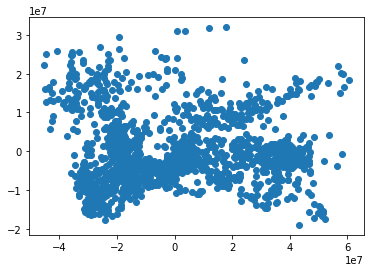

In [20]:
new_data1 = data1[:,:,0:26].reshape(len(epoch1),-1)
model1 = PCA(n_components=2)
model1.fit(new_data1)
new_data1_2d = model1.transform(new_data1)
print(new_data1_2d.shape)
plt.scatter(new_data1_2d[:,0],new_data1_2d[:,1])

(1069, 2)


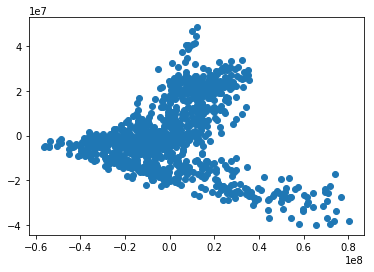

In [21]:
new_data2 = data2[:,:,0:26].reshape(len(epoch2),-1)
model2 = PCA(n_components=2)
model2.fit(new_data2)
new_data2_2d = model2.transform(new_data2)
print(new_data2_2d.shape)
plt.scatter(new_data2_2d[:,0],new_data2_2d[:,1])

(1505, 2)


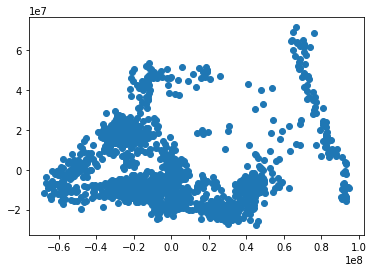

In [22]:
new_data3 = data3[:,:,0:26].reshape(len(epoch3),-1)
model3 = PCA(n_components=2)
model3.fit(new_data3)
new_data3_2d = model3.transform(new_data3)
print(new_data3_2d.shape)
plt.scatter(new_data3_2d[:,0],new_data3_2d[:,1])

(1473, 2)


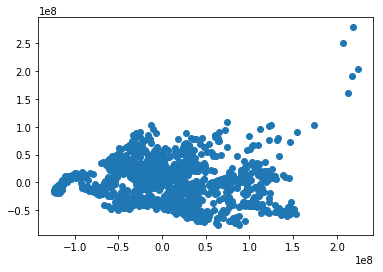

In [23]:
new_data4 = data4[:,:,0:26].reshape(len(epoch4),-1)
model4 = PCA(n_components=2)
model4.fit(new_data4)
new_data4_2d = model4.transform(new_data4)
print(new_data4_2d.shape)
plt.scatter(new_data4_2d[:,0],new_data4_2d[:,1])

(3184, 2)


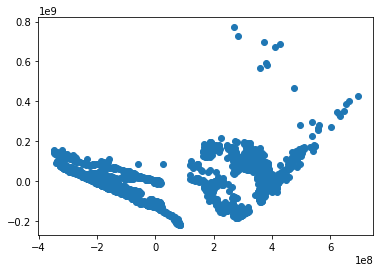

In [24]:
new_data5 = data5[:,:,0:26].reshape(len(epoch5),-1)
model5 = PCA(n_components=2)
model5.fit(new_data5)
new_data5_2d = model5.transform(new_data5)
print(new_data5_2d.shape)
plt.scatter(new_data5_2d[:,0],new_data5_2d[:,1])

(2674, 2)


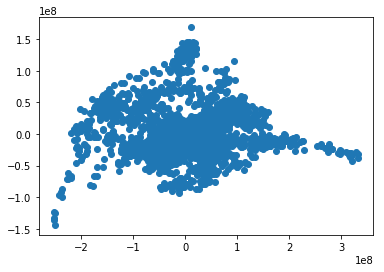

In [25]:
new_data6 = data6[:,:,0:26].reshape(len(epoch6),-1)
model6 = PCA(n_components=2)
model6.fit(new_data6)
new_data6_2d = model6.transform(new_data6)
print(new_data6_2d.shape)
plt.scatter(new_data6_2d[:,0],new_data6_2d[:,1])

In [26]:
#combine all data and epochs and flatten

data_all = np.concatenate((data1[:,:,0:26],data2[:,:,0:26],data3[:,:,0:26],data4[:,:,0:26],data5[:,:,0:26],data6[:,:,0:26]),axis=0)
##normalise each data period separately:
#data_all = np.concatenate((data1[:,:,0:26]/np.max(data1[:,:,0:26]),data2[:,:,0:26]/np.max(data2[:,:,0:26]),data3[:,:,0:26]/np.max(data3[:,:,0:26]),data4[:,:,0:26]/np.max(data4[:,:,0:26]),data5[:,:,0:26]/np.max(data5[:,:,0:26]),data6[:,:,0:26]/np.max(data6[:,:,0:26])),axis=0)

epoch_all = np.concatenate((epoch1[:],epoch2[:],epoch3[:],epoch4[:],epoch5[:],epoch6[:]),axis=0)
print(data_all.shape)
print(epoch_all.shape)
new_data_all = data_all.reshape(len(data_all),-1)
print(new_data_all.shape)

(11333, 12, 26)
(11333,)
(11333, 312)


(11333, 2)


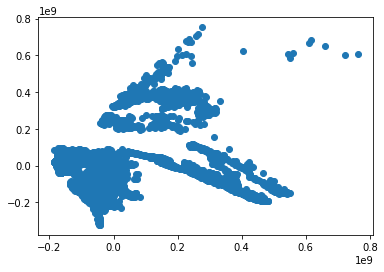

In [27]:
# fit pca 2-components to all flattened data, pre-autoencoder

model_all = PCA(n_components=2)
model_all.fit(new_data_all)
new_data_all_2d = model_all.transform(new_data_all)
print(new_data_all_2d.shape)
plt.scatter(new_data_all_2d[:,0],new_data_all_2d[:,1])

In [28]:
#look at outliers from above
df = pd.DataFrame({'PCA1': new_data_all_2d[:,0], 'PCA2': new_data_all_2d[:,1]})
new_df = df.sort_values(by='PCA1')
new_df.tail(5)

,PCA1,PCA2
8654,608960512.0,665023296.0
8655,614946112.0,683714624.0
8656,658893376.0,652577280.0
8657,723038784.0,602835840.0
8658,763197760.0,609267136.0


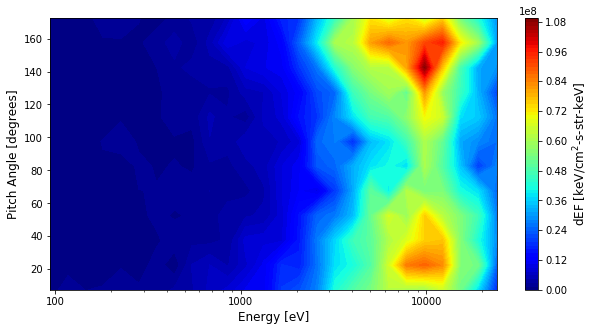

In [29]:
#example outlier from first pca plot

#PITCH_SPIN 2D plotting:
X, Y = np.meshgrid(energy4[0,0:26],pa4)
fig = plt.figure(figsize=(10,5))
ax = plt.axes()
D = (data_all[10859,0:len(pa4),0:26])
#surf = ax.pcolormesh((X), Y, D, cmap=cm.jet)
surf = ax.contourf((X), Y, D, 100, cmap=cm.jet)
cbar = fig.colorbar(surf)
cbar.set_label('dEF [keV/cm$^{2}$-s-str-keV]',fontsize=12)
ax.set_ylabel('Pitch Angle [degrees]',fontsize=12)
ax.set_xlabel('Energy [eV]',fontsize=12)
ax.set_xscale('log')
#ax.set_xticks([50, 100, 200, 300, 400, 500])
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
#ax.set_xlim(0,5)
plt.show()

# Autoencoders

In [81]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 9.75, assuming the input is 312 floats

# this is our input placeholder
input_img = Input(shape=(312,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(312, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

In [82]:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

In [83]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [84]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [85]:
# make sure to use flattened data
x = new_data_all
x_train, x_test = train_test_split(x, test_size=0.5, random_state=4)
print(x_train.shape)
print(x_test.shape)

(5666, 312)
(5667, 312)


In [86]:
x_all = x.astype('float32') / np.max(x)
x_train = x_train.astype('float32') / np.max(x)
x_test = x_test.astype('float32') / np.max(x)

In [87]:
autoencoder.fit(x_all, x_all, ## x_all,x_all or x_train,x_train
                epochs=500,
                batch_size=256,
                shuffle=True,
                validation_split=1/12.) # validation_split=1/12. or validation_test = x_test,x_test
                #last line helps model calculate val_loss

Train on 10388 samples, validate on 945 samples
Epoch 1/500
10388/10388 [==============================] - 0s 26us/step - loss: 0.6807 - val_loss: 0.6661
Epoch 2/500
10388/10388 [==============================] - 0s 15us/step - loss: 0.6404 - val_loss: 0.6011
Epoch 3/500
10388/10388 [==============================] - 0s 15us/step - loss: 0.5269 - val_loss: 0.4219
Epoch 4/500
10388/10388 [==============================] - 0s 15us/step - loss: 0.3463 - val_loss: 0.2581
Epoch 5/500
10388/10388 [==============================] - 0s 15us/step - loss: 0.2471 - val_loss: 0.2074
Epoch 6/500
10388/10388 [==============================] - 0s 16us/step - loss: 0.2150 - val_loss: 0.1963
Epoch 7/500
10388/10388 [==============================] - 0s 13us/step - loss: 0.2026 - val_loss: 0.1944
Epoch 8/500
10388/10388 [==============================] - 0s 15us/step - loss: 0.1959 - val_loss: 0.1945
Epoch 9/500
10388/10388 [==============================] - 0s 15us/step - loss: 0.1911 - val_loss: 0.194

10388/10388 [==============================] - 0s 12us/step - loss: 0.1432 - val_loss: 0.1681
Epoch 154/500
10388/10388 [==============================] - 0s 13us/step - loss: 0.1432 - val_loss: 0.1680
Epoch 155/500
10388/10388 [==============================] - 0s 13us/step - loss: 0.1432 - val_loss: 0.1679
Epoch 156/500
10388/10388 [==============================] - 0s 12us/step - loss: 0.1432 - val_loss: 0.1678
Epoch 157/500
10388/10388 [==============================] - 0s 12us/step - loss: 0.1431 - val_loss: 0.1677
Epoch 158/500
10388/10388 [==============================] - 0s 12us/step - loss: 0.1431 - val_loss: 0.1677
Epoch 159/500
10388/10388 [==============================] - 0s 12us/step - loss: 0.1431 - val_loss: 0.1676
Epoch 160/500
10388/10388 [==============================] - 0s 13us/step - loss: 0.1431 - val_loss: 0.1675
Epoch 161/500
10388/10388 [==============================] - 0s 12us/step - loss: 0.1431 - val_loss: 0.1674
Epoch 162/500
10388/10388 [===============

Epoch 229/500
10388/10388 [==============================] - 0s 15us/step - loss: 0.1422 - val_loss: 0.1644
Epoch 230/500
10388/10388 [==============================] - 0s 12us/step - loss: 0.1422 - val_loss: 0.1644
Epoch 231/500
10388/10388 [==============================] - 0s 12us/step - loss: 0.1422 - val_loss: 0.1643
Epoch 232/500
10388/10388 [==============================] - 0s 13us/step - loss: 0.1422 - val_loss: 0.1643
Epoch 233/500
10388/10388 [==============================] - 0s 12us/step - loss: 0.1422 - val_loss: 0.1643
Epoch 234/500
10388/10388 [==============================] - 0s 12us/step - loss: 0.1422 - val_loss: 0.1643
Epoch 235/500
10388/10388 [==============================] - 0s 12us/step - loss: 0.1422 - val_loss: 0.1643
Epoch 236/500
10388/10388 [==============================] - 0s 13us/step - loss: 0.1422 - val_loss: 0.1643
Epoch 237/500
10388/10388 [==============================] - 0s 12us/step - loss: 0.1422 - val_loss: 0.1642
Epoch 238/500
10388/10388 [=

Epoch 380/500
10388/10388 [==============================] - 0s 12us/step - loss: 0.1417 - val_loss: 0.1636
Epoch 381/500
10388/10388 [==============================] - 0s 12us/step - loss: 0.1417 - val_loss: 0.1636
Epoch 382/500
10388/10388 [==============================] - 0s 13us/step - loss: 0.1417 - val_loss: 0.1636
Epoch 383/500
10388/10388 [==============================] - 0s 13us/step - loss: 0.1417 - val_loss: 0.1636
Epoch 384/500
10388/10388 [==============================] - 0s 14us/step - loss: 0.1417 - val_loss: 0.1636
Epoch 385/500
10388/10388 [==============================] - 0s 12us/step - loss: 0.1417 - val_loss: 0.1636
Epoch 386/500
10388/10388 [==============================] - 0s 12us/step - loss: 0.1417 - val_loss: 0.1636
Epoch 387/500
10388/10388 [==============================] - 0s 12us/step - loss: 0.1417 - val_loss: 0.1636
Epoch 388/500
10388/10388 [==============================] - 0s 12us/step - loss: 0.1417 - val_loss: 0.1636
Epoch 389/500
10388/10388 [=

Epoch 456/500
10388/10388 [==============================] - 0s 12us/step - loss: 0.1416 - val_loss: 0.1636
Epoch 457/500
10388/10388 [==============================] - 0s 17us/step - loss: 0.1416 - val_loss: 0.1636
Epoch 458/500
10388/10388 [==============================] - 0s 14us/step - loss: 0.1416 - val_loss: 0.1636
Epoch 459/500
10388/10388 [==============================] - 0s 12us/step - loss: 0.1416 - val_loss: 0.1636
Epoch 460/500
10388/10388 [==============================] - 0s 11us/step - loss: 0.1416 - val_loss: 0.1636
Epoch 461/500
10388/10388 [==============================] - 0s 11us/step - loss: 0.1416 - val_loss: 0.1636
Epoch 462/500
10388/10388 [==============================] - 0s 12us/step - loss: 0.1416 - val_loss: 0.1636
Epoch 463/500
10388/10388 [==============================] - 0s 13us/step - loss: 0.1416 - val_loss: 0.1636
Epoch 464/500
10388/10388 [==============================] - 0s 12us/step - loss: 0.1416 - val_loss: 0.1636
Epoch 465/500
10388/10388 [=

In [88]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_all) ## x_all or (x_test)
decoded_imgs = decoder.predict(encoded_imgs) ## same as autoencoder.predict(x_all)
print(encoded_imgs.shape)
print(decoded_imgs.shape)

(11333, 32)
(11333, 312)


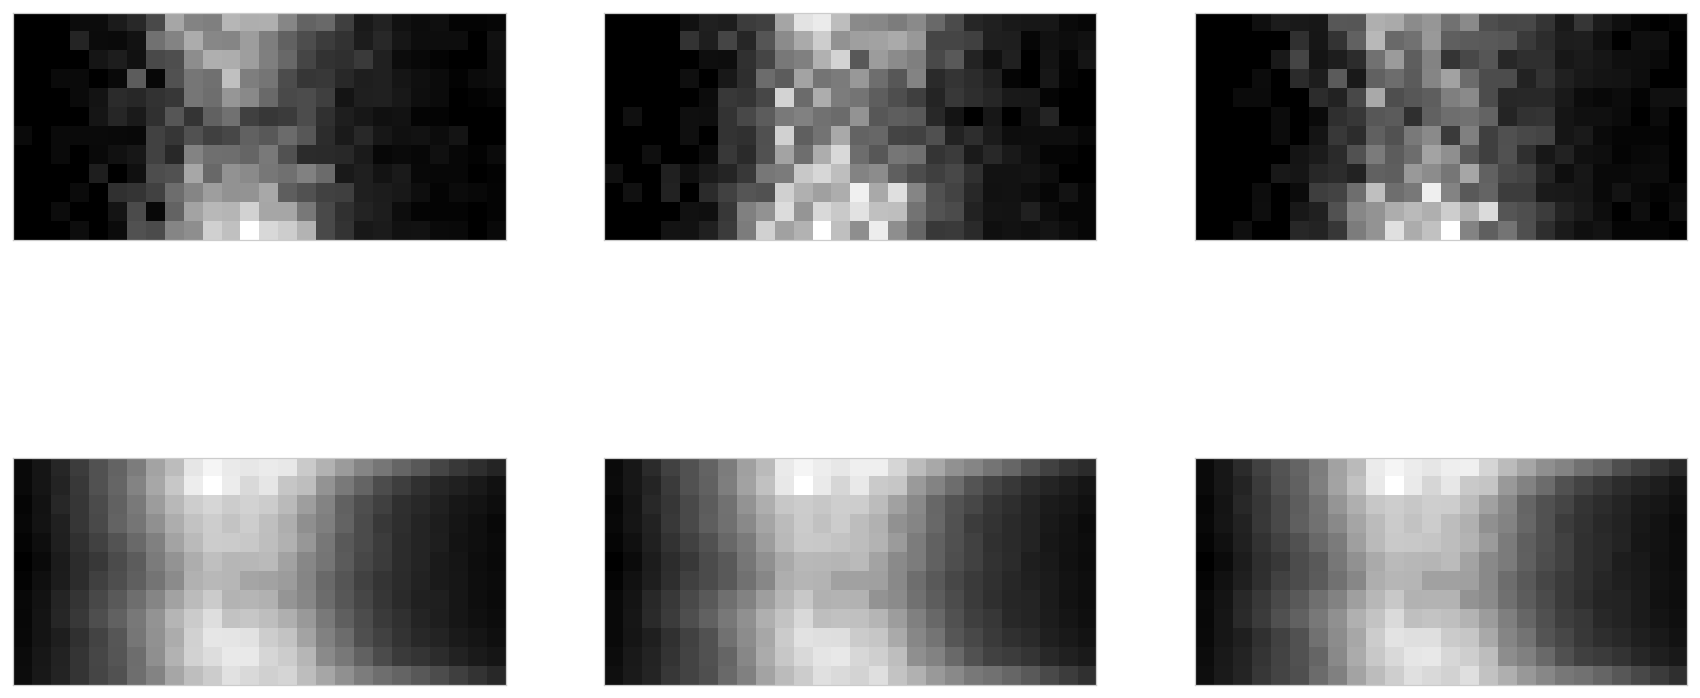

In [89]:
n = 3  # how many digits we will display
plt.figure(figsize=(30,15))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_all[i].reshape(12, 26)) ## x_all or x_test
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(12, 26))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [90]:
##### Outlier detection using Autoencoders
errors = []

for i in range(0,len(x_all)):
    mse = np.mean((x_all[i] - decoded_imgs[i])**2)
    errors.append(mse)

In [91]:
#threshold to determine which data are outliers, based on error

threshold = np.quantile(errors,0.998) 
print('mse 99.8% threshold:',threshold)

mse 99.8% threshold: 0.0020787659492343567


In [92]:
indexes = np.where(np.array(errors) >= threshold)[0]

In [93]:
for i in range(len(indexes)):
    print(indexes[i], epoch_all[indexes[i]])

4356 2005-08-28 16:43:08.209000
4358 2005-08-28 16:43:16.502000
4359 2005-08-28 16:43:20.647000
4361 2005-08-28 16:43:28.939000
4364 2005-08-28 16:43:41.369000
8631 2003-10-13 11:30:15.025000
8637 2003-10-13 11:30:39.075000
8638 2003-10-13 11:30:43.080000
8639 2003-10-13 11:30:47.088000
8640 2003-10-13 11:30:51.095000
8641 2003-10-13 11:30:55.100000
8642 2003-10-13 11:30:59.112000
8643 2003-10-13 11:31:03.124000
8644 2003-10-13 11:31:07.131000
8650 2003-10-13 11:31:31.176000
8651 2003-10-13 11:31:35.184000
8652 2003-10-13 11:31:39.196000
8653 2003-10-13 11:31:43.203000
8654 2003-10-13 11:31:47.213000
8655 2003-10-13 11:31:51.223000
8656 2003-10-13 11:31:55.223000
8657 2003-10-13 11:31:59.231000
8658 2003-10-13 11:32:03.246000


In [94]:
epoch_all[4364]

datetime.datetime(2005, 8, 28, 16, 43, 41, 369000)

(11333, 2)


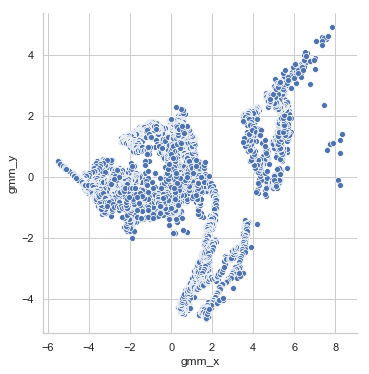

In [95]:
# try pca for encoded 32 dimension testing data, pre decoding (recommended as data is in lower dimension format)

model_encoder = PCA(n_components=2)
encoded_imgs_2d = model_encoder.fit_transform(encoded_imgs)
print(encoded_imgs_2d.shape)
df_gmm = pd.DataFrame({'gmm_x':encoded_imgs_2d[:,0], 'gmm_y':encoded_imgs_2d[:,1]})
sns.pairplot(x_vars=['gmm_x'], y_vars=['gmm_y'], data=df_gmm, height=5)

In [96]:
#fit GMM to PCA encoded data

from sklearn.mixture import GaussianMixture
GMM_Model = GaussianMixture(n_components=3)
y_gmm = GMM_Model.fit_predict(encoded_imgs_2d)
df_gmm['key_gmm'] = y_gmm

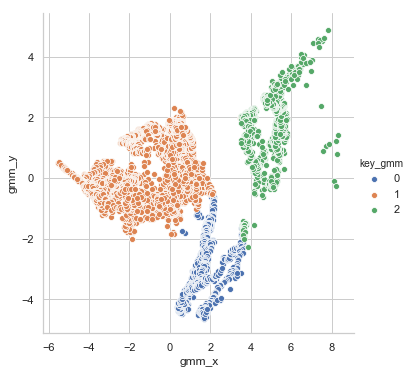

In [97]:
sns.pairplot(x_vars=['gmm_x'], y_vars=['gmm_y'], data=df_gmm, hue='key_gmm', height=5)
sns.set(style="whitegrid")

In [98]:
#fit K-means to PCA encoded data

from sklearn import cluster
kmeans_model = cluster.KMeans(n_clusters=3)
y_kmeans = kmeans_model.fit_predict(encoded_imgs_2d)

In [99]:
df_kmeans = pd.DataFrame({'kmeans_x':encoded_imgs_2d[:,0], 'kmeans_y':encoded_imgs_2d[:,1]})
df_kmeans['key_kmeans'] = y_kmeans

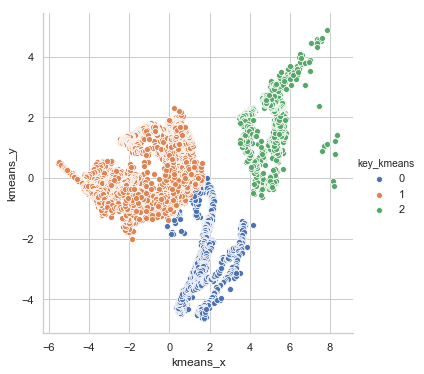

In [100]:
sns.pairplot(x_vars=['kmeans_x'], y_vars=['kmeans_y'], data=df_kmeans, hue='key_kmeans', height=5)
#sns.set(style="whitegrid")

In [101]:
#fit Spectral Clustering to PCA encoded data

from sklearn.cluster import SpectralClustering
s_clustering = SpectralClustering(n_clusters=3,
        assign_labels="discretize",
        random_state=0)
y_s_clustering = s_clustering.fit_predict(encoded_imgs_2d)

In [102]:
df_s_clustering = pd.DataFrame({'s_clustering_x':encoded_imgs_2d[:,0], 's_clustering_y':encoded_imgs_2d[:,1]})
df_s_clustering['key_s_clustering'] = y_s_clustering

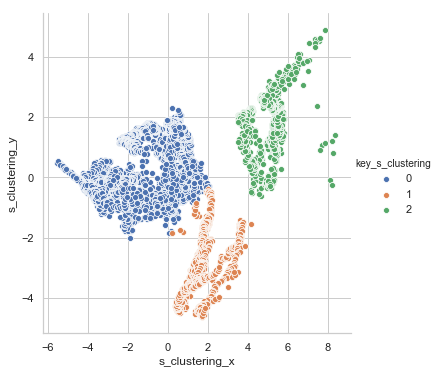

In [103]:
sns.pairplot(x_vars=['s_clustering_x'], y_vars=['s_clustering_y'], data=df_s_clustering, hue='key_s_clustering', height=5)
#sns.set(style="whitegrid")

(11333, 2)


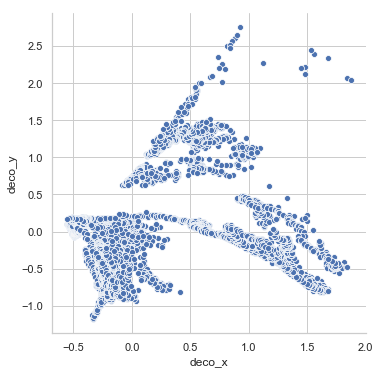

In [104]:
#apply pca to post-autoencoder testing data

model_autoen = PCA(n_components=2)
model_autoen.fit(decoded_imgs)
decoded_imgs_2d = model_autoen.transform(decoded_imgs)
print(decoded_imgs_2d.shape)
df_deco = pd.DataFrame({'deco_x':decoded_imgs_2d[:,0], 'deco_y':decoded_imgs_2d[:,1]})
sns.pairplot(x_vars=['deco_x'], y_vars=['deco_y'], data=df_deco, height=5)

# Convolutional Autoencoder

In [79]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K

input_img = Input(shape=(12, 28, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(8, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(4, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(4, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = Conv2D(4, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(4, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [80]:
d2_x = data_all
d2_x_train, d2_x_test = train_test_split(d2_x, test_size=0.2, random_state=2)
print(d2_x_train.shape)
print(d2_x_test.shape)

(4380, 12, 28)
(1095, 12, 28)


In [81]:
d2_x_train = d2_x_train.astype('float32') / np.max(d2_x)
d2_x_test = d2_x_test.astype('float32') / np.max(d2_x)
d2_x_train = np.reshape(d2_x_train, (len(d2_x_train), 12, 28, 1))  
d2_x_test = np.reshape(d2_x_test, (len(d2_x_test), 12, 28, 1))  

In [82]:
autoencoder.fit(d2_x_train, d2_x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(d2_x_test, d2_x_test))

Train on 4380 samples, validate on 1095 samples
Epoch 1/50
4380/4380 [==============================] - 2s 496us/step - loss: 0.3024 - val_loss: 0.1074
Epoch 2/50
4380/4380 [==============================] - 2s 453us/step - loss: 0.1036 - val_loss: 0.0996
Epoch 3/50
4380/4380 [==============================] - 2s 458us/step - loss: 0.0964 - val_loss: 0.0922
Epoch 4/50
4380/4380 [==============================] - 2s 374us/step - loss: 0.0876 - val_loss: 0.0857
Epoch 5/50
4380/4380 [==============================] - 1s 341us/step - loss: 0.0847 - val_loss: 0.0833
Epoch 6/50
4380/4380 [==============================] - 1s 339us/step - loss: 0.0830 - val_loss: 0.0820
Epoch 7/50
4380/4380 [==============================] - 2s 367us/step - loss: 0.0816 - val_loss: 0.0799
Epoch 8/50
4380/4380 [==============================] - 2s 347us/step - loss: 0.0806 - val_loss: 0.0800
Epoch 9/50
4380/4380 [==============================] - 2s 350us/step - loss: 0.0798 - val_loss: 0.0786
Epoch 10/50
4380

In [83]:
d2_decoded_imgs = autoencoder.predict(d2_x_test)
print(d2_decoded_imgs.shape)

(1095, 12, 28, 1)


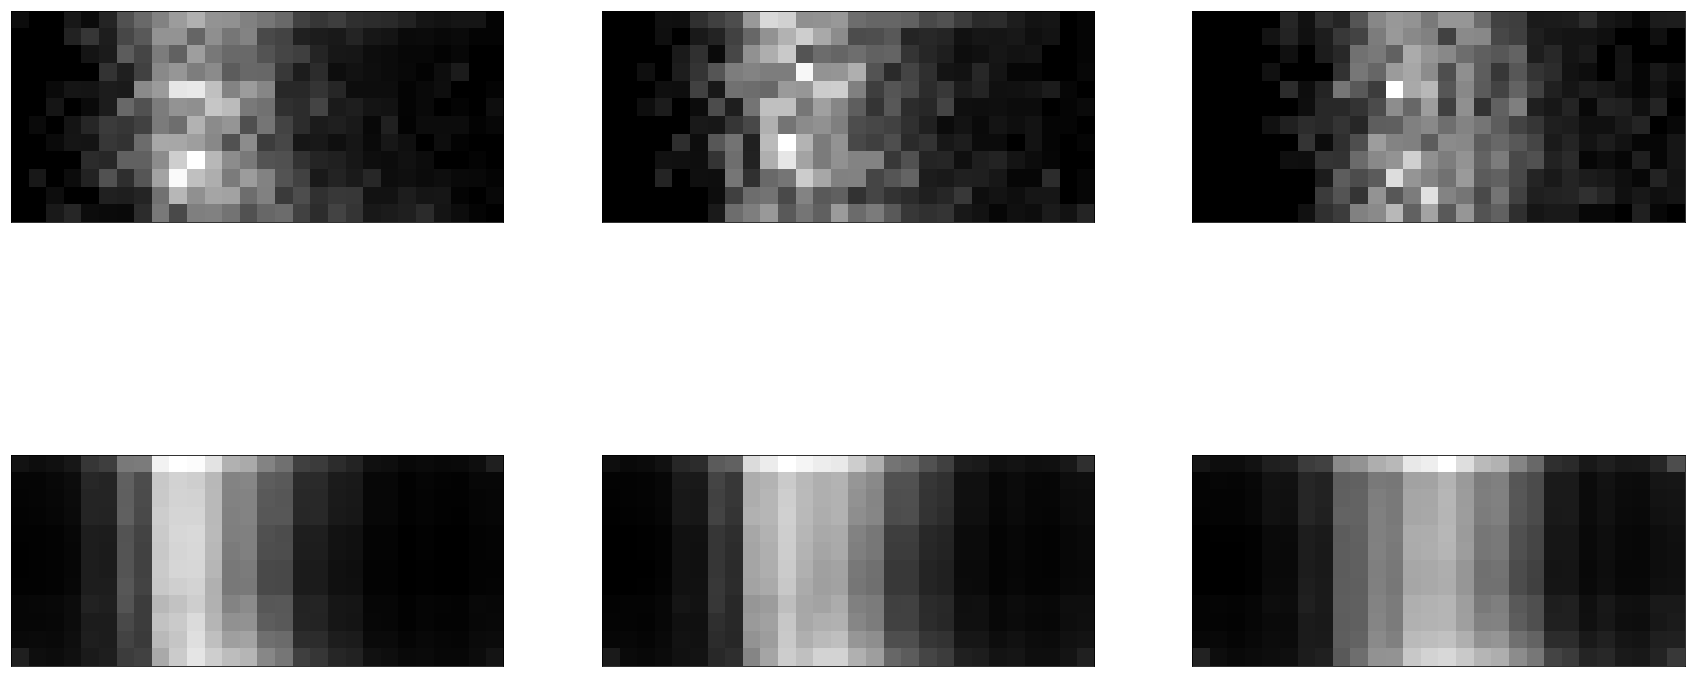

In [84]:
n = 3  # how many digits we will display
plt.figure(figsize=(30,15))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(d2_x_test[i].reshape(12, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(d2_decoded_imgs[i].reshape(12, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [85]:
print(d2_decoded_imgs.shape)
d2_decoded_imgs = d2_decoded_imgs.reshape((len(d2_decoded_imgs),12,28))
print(d2_decoded_imgs.shape)
flat_decoded_imgs = d2_decoded_imgs.reshape(len(d2_decoded_imgs),-1)
print(flat_decoded_imgs.shape)

(1095, 12, 28, 1)
(1095, 12, 28)
(1095, 336)


(1095, 2)


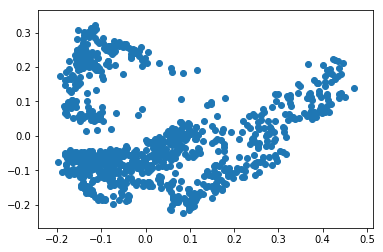

In [86]:
#apply pca to post conv-autoen testing data

model_conv = PCA(n_components=2)
model_conv.fit(flat_decoded_imgs)
flat_decoded_imgs_pca = model_conv.transform(flat_decoded_imgs)
print(flat_decoded_imgs_pca.shape)
plt.scatter(flat_decoded_imgs_pca[:,0],flat_decoded_imgs_pca[:,1])

(1095, 2)


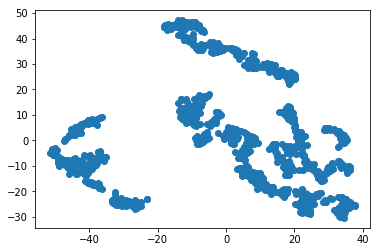

In [87]:
#apply tsne to post conv-autoen testing data

model_conv = TSNE(n_components=2)
decoded_imgs_tsne = model_conv.fit_transform(flat_decoded_imgs)
print(decoded_imgs_tsne.shape)
plt.scatter(decoded_imgs_tsne[:,0],decoded_imgs_tsne[:,1])

In [ ]:
### next: 
### use anomaly detection method